In order to better understand the data, further exploratory data analysis will be done by visualizing the data in various aspects. In this notebook,I focus on users table while the web session table will be explored in other files. Specifically, I investigate the following issues:
1. Investigate the how many missing values do we have for each variable?
2. Visualizing the relationship between booking detination and some variables with missing values and determine what approaches should be adopted to combat the missing values.
3. Exploring the relationship between booking destination (dependent variable) and date-time variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Draw inline
%matplotlib inline
#Takes care of floats
from __future__ import division

#make the pandas look easier to read
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

Let's get the two tables together so we can work with all the data.

In [3]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


The data seems to be in an usable format so the next important thing is to take a look at the missing data.

### Percentage of Missing Values

First, let's see the percentage of missing data in the variables. The variables with low percentage of missing data do not need further investigation. In the following plots, I use the red bar to denote the missing part of the variables and use the blue bar to denote the normal data.

#### 1. 'Gender'

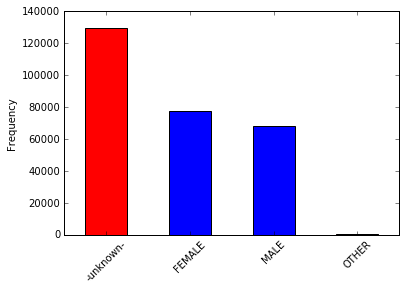

In [10]:
users.gender.value_counts(dropna=False).plot(kind='bar',color='rbbr',rot=45)
plt.ylabel("Frequency")
plt.show()

There are around 46% missing values in 'genders', which is a significant amount.

#### 2. age

The age values within the range between 14 to 95 years old are defined as 'normal' input; otherwise they are defined as 'abnormal' values.

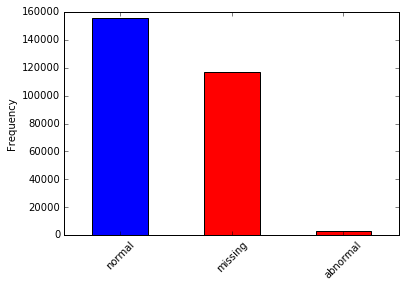

In [30]:
#number of null
age_2=users.age.isnull().sum()
#number of normal data:
age_1=len(users[(users.age<95) & (users.age>14)])
age_3=len(users)-users.age.isnull().sum()-len(users[(users.age<95) & (users.age>14)])
pd.Series([age_1,age_2,age_3],index=['normal','missing','abnormal']).plot(kind='bar',color='brr',rot=45)
plt.ylabel("Frequency")
plt.show()

In [22]:
percent =age_2/(age_1+age_2+age_3)*100
print 'There are around %d%% percent missing values in \'age\'.' %percent

There are around 42% percent missing values in 'age'.


#### 3. first_device_type

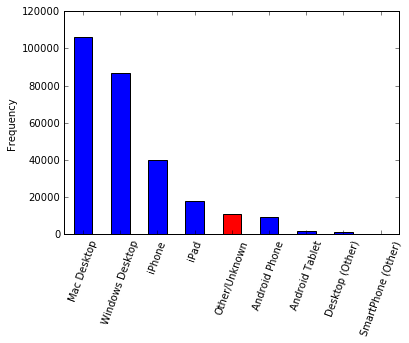

In [31]:
users.first_device_type.value_counts(dropna=False).plot(kind='bar',color='bbbbrbbbbbbbbb',rot = 70) 
plt.ylabel("Frequency")
plt.show()

#### 4. first_browser

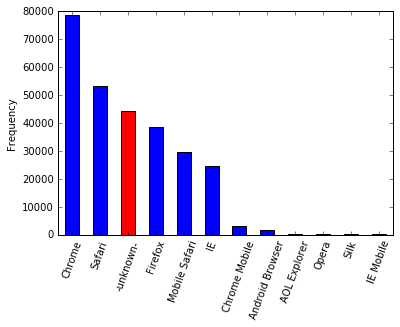

In [32]:
users.first_browser.value_counts(dropna=False)[:12].plot(kind='bar',color='bbrbbbbbbbbbbbbbb',rot =70)
plt.ylabel("Frequency")
plt.show()

#### 5. first_affiliate_tracked

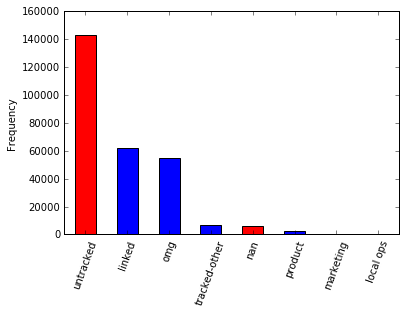

In [33]:
users.first_affiliate_tracked.value_counts(dropna=False).plot(kind='bar',color='rbbbrbbbbbbb',rot=70)
plt.ylabel("Frequency")
plt.show()

#### 6. users.language.value_counts()  

In [34]:
users.language.value_counts()  

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
da               75
pl               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

With only one sample with missing value for 'languange'. Further processing not needed for this 'languange' variable.

__Remark__: There are noticeable amount of missing values with variables 'Gender', 'age', 'first_device_type', 'first_browser', 'first_affiliate_tracked'. Next, I will visualize the data to determine whether  'missing at random' or 'missing not at random' (whether missingness depends on the unobserved part or missing value itself). There are rigorous test in this regard, but visualizing them is always the first good step to go.

### Data visualization

#### 1. Variables with missing data

##### age

First, let's check the booking behavior of 'missing' group is more like yonger users or older users. Specifically, I group all users according a cutoff value of age. For instance, the users yonger than 40 years old is defined as younger users while the users older than 40 is defined as older users. Then, 

In [35]:
# let's get a cluster of three groups of data, ,e.g., one group being younger users furter grouped by destinations.
G = train_users.copy()
G['age_G']= 'young'
G['age_G']= G['age_G'].where(G.age<40, 'old')
G['age_G']= G['age_G'].where(G.age.notnull() , 'missing')

G = G.groupby(['age_G','country_destination']).size().unstack('age_G')

#normalized by the total number of users in each group (sum of each column)
G = G.div(G.sum(axis=0), axis=1)
#reorder
G = G[['young','old','missing']]
G

age_G,young,old,missing
country_destination,,,
AU,0.003437,0.003558,0.001171
CA,0.008381,0.009020,0.003989
DE,0.006686,0.006990,0.002387
ES,0.014834,0.010949,0.006171
FR,0.028534,0.031869,0.014888
GB,0.013267,0.016010,0.006251
IT,0.016038,0.016636,0.009081
NDF,0.436866,0.489966,0.768428
NL,0.004991,0.004385,0.001818


_Each entry above represents the percentage of users in each group (young/old/Missing)._

Below is shown the bar plot of percentage of users in each group  (young/old/Missing) across all destination countries.

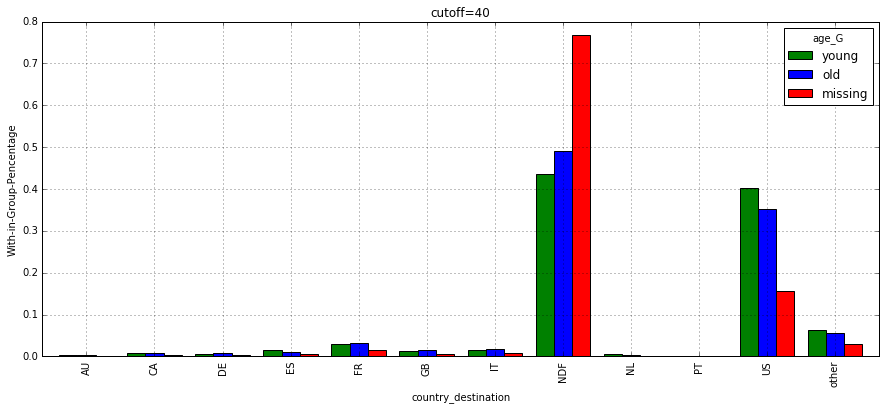

In [37]:
G.plot(kind='bar',width=0.8,color='gbr',title='cutoff=40').grid()
plt.ylabel('With-in-Group-Pencentage')
fig = plt.gcf()
fig.set_size_inches(15, 6)

_The height of each bar represents the percentage of users within its group._

It can be seen that the pattern of missing values for the variable 'age' is missing not at random. This is because the booking beharior is very different accross different user groups. The missingness is highly related to the unobserved reponse variable.

let's see the bar plot, if the cutoff value for defining groups 'young' and 'old' is changed to 18 from 40.

In [38]:
# let's get a cluster of three groups of data, ,e.g., one group being younger users furter grouped by destinations.
G = train_users.copy()
G['age_G']= 'young'
G['age_G']= G['age_G'].where(G.age<18, 'old')
G['age_G']= G['age_G'].where(G.age.notnull() , 'missing')

G = G.groupby(['age_G','country_destination']).size().unstack('age_G')

#normalized by sum of accorss rows
G = G.div(G.sum(axis=0), axis=1)
#reorder
G = G[['young','old','missing']]
#G

age_G,young,old,missing
country_destination,,,
AU,NaN,0.003480,0.001171
CA,NaN,0.008595,0.003989
DE,0.006329,0.006784,0.002387
ES,0.006329,0.013607,0.006171
FR,0.012658,0.029616,0.014888
GB,0.012658,0.014142,0.006251
IT,0.012658,0.016233,0.009081
NDF,0.860759,0.453245,0.768428
NL,NaN,0.004804,0.001818


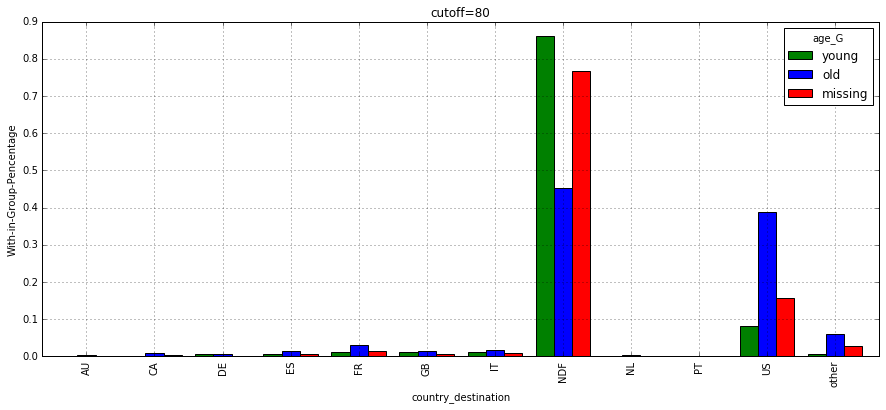

In [39]:
G.plot(kind='bar',width=0.8,color='gbr',title='cutoff=80').grid()
plt.ylabel('With-in-Group-Pencentage')
fig = plt.gcf()
fig.set_size_inches(15, 6)

From the figure above, it is seen that the users younger than 18 years old behaves more like Group 'missing'. This could be explained by the fact that users younger than 18 years old usually do not have the finacial ability to book .

##### Gender

Similar behavor can be observed with the gender variable. Namely, the users in 'missing' group tends not to book. The bar plot and relavant table are shown below.

In [41]:
# let's get a cluster of three groups of data, ,e.g., one group being younger users furter grouped by destinations.
G = train_users.copy()
G = G.groupby(['gender','country_destination']).size().unstack('gender')

#reorder
G = G[['FEMALE','MALE','-unknown-','OTHER']]
#normalized by sum of accorss rows
G = G.div(G.sum(axis=0), axis=1)
G

gender,FEMALE,MALE,-unknown-,OTHER
country_destination,,,,
AU,0.003284,0.003453,0.001494,0.003546
CA,0.007218,0.008762,0.005131,0.017730
DE,0.005679,0.007641,0.002968,0.010638
ES,0.013531,0.012436,0.007472,0.014184
FR,0.031123,0.024522,0.017902,0.046099
GB,0.013975,0.012528,0.007922,0.010638
IT,0.017306,0.012840,0.010869,0.017730
NDF,0.492505,0.490797,0.696744,0.375887
NL,0.004029,0.005107,0.002372,0.010638


_Each entry above represents the percentage of users in each group (female/male/Missing)._

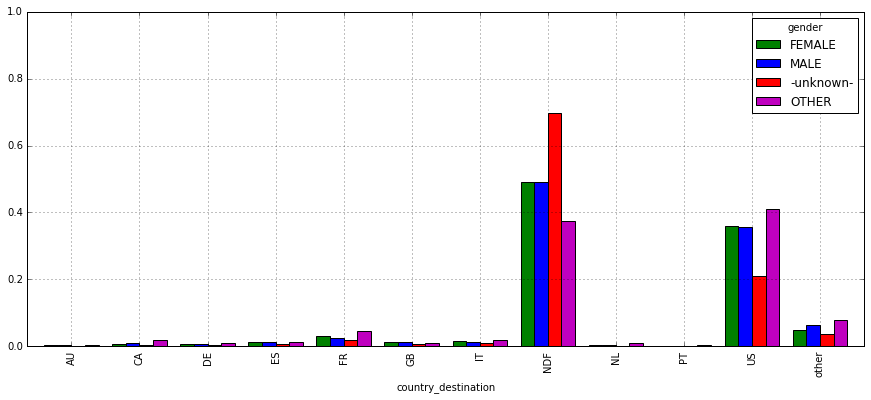

In [42]:
G.plot(kind='bar',width=0.8,color='gbrm',ylim=[0,1]).grid()
fig = plt.gcf()
fig.set_size_inches(15, 6)

Groups femle and male have very similar booking behavior, while group missing behaves quite differently. The reasons is similar to that for variable 'age'.

##### Other vairables with missing values

Bar plots for other variables with missing values were also checked, but no significantly different behaviors were observed. A example (for variable first_affiliate_tracked) is provided below. in order to make the graph simple to observe, only the bars for two major destination country are plotted.

In [46]:
# let's get a cluster of three groups of data, ,e.g., one group being younger users furter grouped by destinations.
G = train_users.copy()
G.first_affiliate_tracked.fillna('missing',inplace=True)
G = G.groupby(['first_affiliate_tracked','country_destination']).size().unstack('first_affiliate_tracked')

#normalized by sum of each column
G = G.div(G.sum(axis=0), axis=1)
G = G.loc[['NDF','US']]
#drop the least important two columns
#G.drop(['local ops','marketing'],axis=1,inplace=True) 
G

first_affiliate_tracked,linked,local ops,marketing,missing,omg,product,tracked-other,untracked
country_destination,,,,,,,,
NDF,0.565710,0.735294,0.546763,0.713438,0.626552,0.651671,0.628005,0.562958
US,0.308683,0.147059,0.359712,0.215829,0.251307,0.227506,0.290286,0.306961


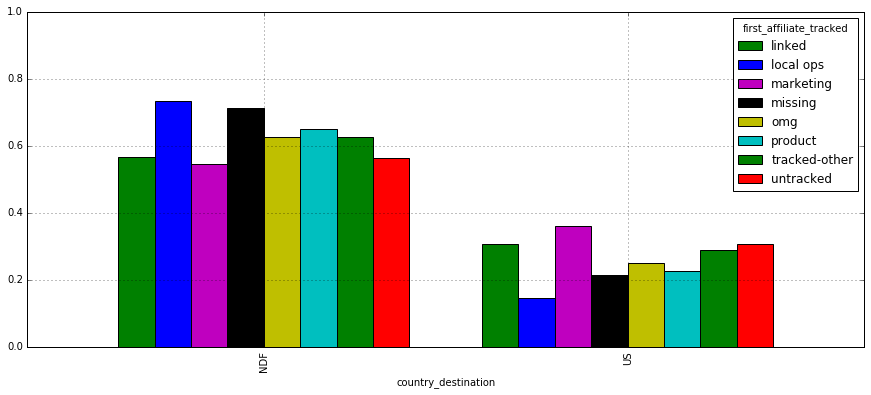

In [72]:
G.plot(kind='bar',width=0.8,ylim=[0,1],color='gbmkycgr').grid() #color='gbrm',
fig = plt.gcf()
fig.set_size_inches(15, 6)

__Remark:__ From bar plots above, very different behavior is observed for samples with missing values for the 'age' and 'gender' variables. Therefore, it's good to use the mean variable substitution with indicator variable as the imputation apprach as the way to combating missingness of the age variable. For the other categorical variables with missing data, I simple leave them as is. It should be expected that gender should be a important feature for classification.

#### Date-time variables

The other set of variables I want to investigate are the date-time variables, which are date_account_created and timestamp_first_active. Let's begin with date_account_created:

In [73]:
#Preparing the related data type.
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_active'] = pd.to_datetime((train_users.timestamp_first_active // 1000000), format='%Y%m%d')

##### Booking destination vs. Month  across different years

With date-time variables, it's a good practice to decompose them. let's do it and take a look at the plot of booking destination vs. month (decomposed from date_account_created) across years. To make the graph readable, let's focus on the two major destination categories, i.e., 'NDF' and 'US'.

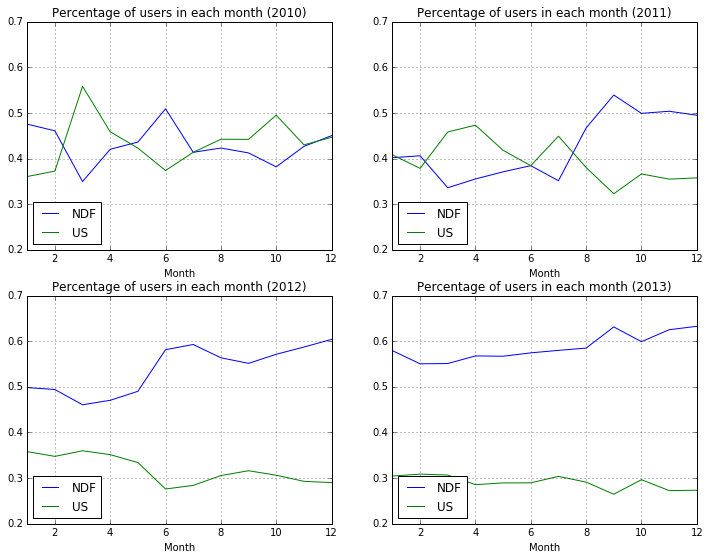

In [83]:
#this is necessary for groupby()
train_users['country_destination'] = train_users['country_destination'].astype(str)

i = 1
for year in range(2010,2014):   
    d = train_users[train_users.date_account_created.dt.year ==year].copy()
    #d = train_users[train_users.date_account_created.dt.year>=year].copy()
    d['Month']=d.date_account_created.dt.month

    d = d.groupby(['Month','country_destination']).size().unstack('country_destination')
    #d

    #normalized (by the total number users registered each month) user behavior
    d = d.div(d.sum(axis=1), axis=0)
    d = d[['NDF','US']]

    plt.subplot(2,2,i)
    d.NDF.plot(label = 'NDF')
    d.US.plot(label = 'US')
    plt.legend(loc='lower left')
    plt.ylim(0.2,0.7)
    plt.grid()
    #plt.title('Year: %s'%year)
    plt.title("Percentage of users in each month (%s)"%year,)
    plt.xlabel('Month')
    i = i+1
    
fig = plt.gcf()
fig.set_size_inches(12, 9)

From the figure above, it can be seen that in the recent years, such as 2012 and 2013, more and more users regiester but without booking. Also, users whose accounts were created in the months from Aug. to Dec. are more likely not to book. This might be caused by the fact users do not like to travel in winter.   __These plots imply that the 'year' and 'month' decomposed from date_account_created are expcted to be good predictors.__

##### Booking destination vs. days of week

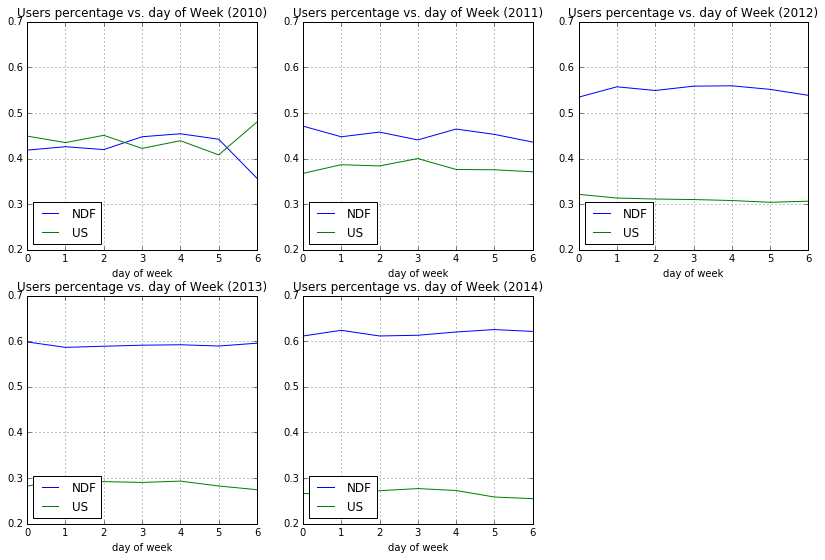

In [88]:
i = 1
for year in range(2010,2015):   
    d = train_users[train_users.date_account_created.dt.year ==year].copy()
    d['dayofweek']=d.date_account_created.dt.dayofweek

    d = d.groupby(['dayofweek','country_destination']).size().unstack('country_destination')
    #d

    #normalized (by the total number users registered each month) user behavior
    d = d.div(d.sum(axis=1), axis=0)
    d = d[['NDF','US']]

    plt.subplot(2,3,i)
    d.NDF.plot(label = 'NDF')
    d.US.plot(label = 'US')
    plt.legend(loc='lower left')
    plt.ylim(0.2,0.7)
    plt.grid()
    #plt.title('Year: %s'%year)
    plt.title("Users percentage vs. day of Week (%s)"%year,)
    plt.xlabel('day of week')
    i = i+1
    
fig = plt.gcf()
fig.set_size_inches(14, 9)

The uniform response shown above suggests that day of week does not seems to be a promissing feature.